In [1]:
import pandas as pd
import seaborn as sns
from utils import shuffle, train_test_split, min_max_normalize, label_encoder, confusion_matrix, accuracy 
from neighbors import KNNClassifier


In [2]:

iris = pd.read_csv('./data/Iris.csv')
iris['Species'], labels = label_encoder(iris['Species'].values.tolist())

train, test = train_test_split(iris, train_size=0.7)

x_train = train.drop('Species', axis=1)
x_test = test.drop('Species', axis=1)

y_train = train['Species']
y_test = test['Species']


# if use the entire dataset, to generate the min and max values, will be 'cheating on the game'. 
# You need to normalize test using train min and max. This is also valid for new entries in production
x_train, minmax = min_max_normalize(x_train)
x_test, _ = min_max_normalize(x_test)

x_train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.528215,0.474510,0.425397,0.502179,0.496825
std,0.291221,0.238178,0.183877,0.285548,0.309316
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299320,0.323529,0.291667,0.118644,0.125000
50%,0.530612,0.441176,0.416667,0.593220,0.541667
75%,0.782313,0.647059,0.500000,0.711864,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
%%time
knn = KNNClassifier(k=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

CPU times: user 1.79 ms, sys: 833 µs, total: 2.62 ms
Wall time: 2.09 ms


acc 100.00


<AxesSubplot:>

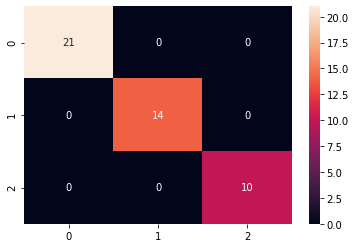

In [4]:
acc = accuracy(y_test, y_pred) * 100
conf = confusion_matrix(y_test, y_pred)
print('acc %.2f' % acc)
sns.heatmap(conf, annot=True)